In [136]:
import numpy as np
import pandas as pd

## Reading Data

In [137]:
data = pd.read_csv('lending-club-data.csv')
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,sub_grade_num,delinq_2yrs_zero,pub_rec_zero,collections_12_mths_zero,short_emp,payment_inc_ratio,final_d,last_delinq_none,last_record_none,last_major_derog_none
0,1077501,1296599,5000,5000,4975,36 months,10.65,162.87,B,B2,...,0.4,1,1,1,0,8.14350,20141201T000000,1,1,1
1,1077430,1314167,2500,2500,2500,60 months,15.27,59.83,C,C4,...,0.8,1,1,1,1,2.39320,20161201T000000,1,1,1
2,1077175,1313524,2400,2400,2400,36 months,15.96,84.33,C,C5,...,1.0,1,1,1,0,8.25955,20141201T000000,1,1,1
3,1076863,1277178,10000,10000,10000,36 months,13.49,339.31,C,C1,...,0.2,1,1,1,0,8.27585,20141201T000000,0,1,1
4,1075269,1311441,5000,5000,5000,36 months,7.90,156.46,A,A4,...,0.8,1,1,1,0,5.21533,20141201T000000,1,1,1


## Eploring column names

In [138]:
print data.columns.values

['id' 'member_id' 'loan_amnt' 'funded_amnt' 'funded_amnt_inv' 'term'
 'int_rate' 'installment' 'grade' 'sub_grade' 'emp_title' 'emp_length'
 'home_ownership' 'annual_inc' 'is_inc_v' 'issue_d' 'loan_status'
 'pymnt_plan' 'url' 'desc' 'purpose' 'title' 'zip_code' 'addr_state' 'dti'
 'delinq_2yrs' 'earliest_cr_line' 'inq_last_6mths' 'mths_since_last_delinq'
 'mths_since_last_record' 'open_acc' 'pub_rec' 'revol_bal' 'revol_util'
 'total_acc' 'initial_list_status' 'out_prncp' 'out_prncp_inv'
 'total_pymnt' 'total_pymnt_inv' 'total_rec_prncp' 'total_rec_int'
 'total_rec_late_fee' 'recoveries' 'collection_recovery_fee' 'last_pymnt_d'
 'last_pymnt_amnt' 'next_pymnt_d' 'last_credit_pull_d'
 'collections_12_mths_ex_med' 'mths_since_last_major_derog' 'policy_code'
 'not_compliant' 'status' 'inactive_loans' 'bad_loans' 'emp_length_num'
 'grade_num' 'sub_grade_num' 'delinq_2yrs_zero' 'pub_rec_zero'
 'collections_12_mths_zero' 'short_emp' 'payment_inc_ratio' 'final_d'
 'last_delinq_none' 'last_recor

In [139]:
data['safe_loans'] = data['bad_loans'].apply(lambda x : +1 if x==0 else -1)

In [140]:
data.drop(['bad_loans'], inplace=True, axis = 1)

In [141]:
data['safe_loans'].value_counts() / data.shape[0]

 1    0.811185
-1    0.188815
dtype: float64

## Features for algorithm

In [142]:
features = ['grade',                     # grade of the loan
            'sub_grade',                 # sub-grade of the loan
            'short_emp',                 # one year or less of employment
            'emp_length_num',            # number of years of employment
            'home_ownership',            # home_ownership status: own, mortgage or rent
            'dti',                       # debt to income ratio
            'purpose',                   # the purpose of the loan
            'term',                      # the term of the loan
            'last_delinq_none',          # has borrower had a delinquincy
            'last_major_derog_none',     # has borrower had 90 day or worse rating
            'revol_util',                # percent of available credit being used
            'total_rec_late_fee',        # total late fees received to day
           ]

target = 'safe_loans'                    # prediction target (y) (+1 means safe, -1 is risky)

# Extract the feature columns and target column
features = data[features]
target = data[target]

In [143]:
from sklearn.feature_extraction import DictVectorizer
vec      = DictVectorizer()

In [144]:
def read_index(filename):
    with open(filename, 'r') as f:
        first_line = f.readline()
    first_line = first_line.translate(None,'[]"').strip().split(',')
    first_line = [x.strip() for x in first_line]
    return first_line

train_idx = read_index('train-idx.json')
validation_idx = read_index('valid-idx.json')
train_idx = [int(x) for x in train_idx]
validation_idx = [int(x) for x in validation_idx]

In [145]:
print train_idx[:5]
print validation_idx[:5]

features = pd.get_dummies(features)

[1, 6, 7, 10, 12]
[24, 41, 60, 93, 132]


In [146]:
train_data = features.iloc[train_idx]
validation_data = features.iloc[validation_idx]
train_target = target[train_idx]
validation_target = target[validation_idx]

## Building models

In [147]:
from sklearn.tree import DecisionTreeClassifier

In [148]:
decision_tree_model = DecisionTreeClassifier(max_depth=6)
decision_tree_model.fit(train_data, train_target)

DecisionTreeClassifier(compute_importances=None, criterion='gini',
            max_depth=6, max_features=None, max_leaf_nodes=None,
            min_density=None, min_samples_leaf=1, min_samples_split=2,
            random_state=None, splitter='best')

In [149]:
small_model  = DecisionTreeClassifier(max_depth=2)
small_model.fit(train_data, train_target)

DecisionTreeClassifier(compute_importances=None, criterion='gini',
            max_depth=2, max_features=None, max_leaf_nodes=None,
            min_density=None, min_samples_leaf=1, min_samples_split=2,
            random_state=None, splitter='best')

In [150]:
validation_data = np.array(validation_data)
validation_target = np.array(validation_target)

validation_safe_loans = validation_data[validation_target == 1]
validation_risky_loans = validation_data[validation_target == -1]

sample_validation_data_risky = validation_risky_loans[0:2]
sample_validation_data_safe = validation_safe_loans[0:2]

sample_validation_data = np.concatenate([sample_validation_data_safe, sample_validation_data_risky])

In [151]:
preds = decision_tree_model.predict(sample_validation_data)
print preds 

[ 1 -1 -1  1]


## Quiz Question: What percentage of the predictions on sample_validation_data did decision_tree_model get correct?

In [152]:
0.5

0.5

In [153]:
preds = decision_tree_model.predict_proba(sample_validation_data)
print preds 

[[ 0.34156543  0.65843457]
 [ 0.53630646  0.46369354]
 [ 0.64750958  0.35249042]
 [ 0.20789474  0.79210526]]


## Quiz Question: Which loan has the highest probability of being classified as a safe loan?



In [162]:
# Four example

0.75
second
during
+1

In [159]:
preds = small_model.predict_proba(sample_validation_data)

In [160]:
print preds[:10]

[[ 0.41896585  0.58103415]
 [ 0.59255339  0.40744661]
 [ 0.59255339  0.40744661]
 [ 0.23120112  0.76879888]]


## Quiz Question: Notice that the probability preditions are the exact same for the 2nd and 3rd loans. Why would this happen?

Same tree traverse values.

## Visualize tree

In [173]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import os
import subprocess

def visualize_tree(tree, feature_names):
    """Create tree png using graphviz.

    Args
    ----
    tree -- scikit-learn DecsisionTree.
    feature_names -- list of feature names.
    """
    with open("dt.dot", 'w') as f:
        export_graphviz(tree, out_file=f,
                        feature_names=feature_names)

    command = ["dot", "-Tpng", "dt.dot", "-o", "dt.png"]
    try:
        subprocess.check_call(command)
    except:
        exit("Could not run dot, ie graphviz, to "
             "produce visualization")

In [174]:
visualize_tree(small_model, features.columns.values)

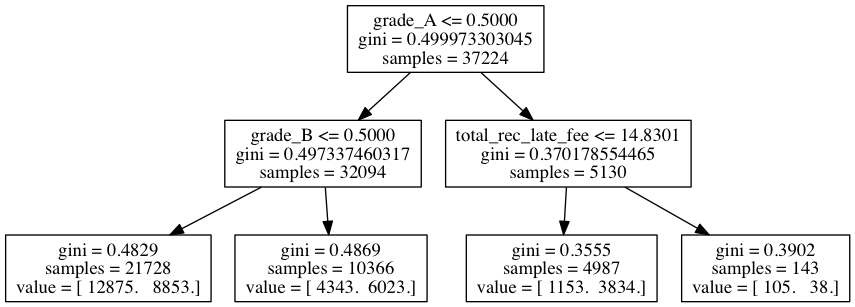

In [175]:
from IPython.display import Image
Image(filename='dt.png') 

In [176]:
sample_validation_data[1]

array([  0.  ,  10.  ,  16.85,   1.  ,   1.  ,  96.4 ,   0.  ,   0.  ,
         0.  ,   0.  ,   1.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
         0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
         0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   1.  ,   0.  ,   0.  ,
         0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
         0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
         0.  ,   0.  ,   0.  ,   0.  ,   1.  ,   0.  ,   0.  ,   1.  ,
         0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
         0.  ,   1.  ,   0.  ])

## Quiz Question: Based on the visualized tree, what prediction would you make for this data point (according to small_model)?

-1

In [179]:
small_model.score(train_data, train_target)

0.61350204169353106

In [180]:
decision_tree_model.score(train_data, train_target)

0.64052761659144641

## Quiz Question: What is the accuracy of decision_tree_model on the validation set, rounded to the nearest .01?



In [181]:
decision_tree_model.score(validation_data,validation_target)

0.63614821197759586

In [182]:
big_model = DecisionTreeClassifier(max_depth=10)
big_model.fit(train_data, train_target)

DecisionTreeClassifier(compute_importances=None, criterion='gini',
            max_depth=10, max_features=None, max_leaf_nodes=None,
            min_density=None, min_samples_leaf=1, min_samples_split=2,
            random_state=None, splitter='best')

In [183]:
big_model.score(train_data, train_target)

0.66379217709004945

In [184]:
big_model.score(validation_data, validation_target)

0.62656182679879358

## Quiz Question: How does the performance of big_model on the validation set compare to decision_tree_model on the validation set? Is this a sign of overfitting?



Will check

## Quiz Question: Let's assume that each mistake costs us money: a false negative costs $10,000, while a false positive positive costs $20,000. What is the total cost of mistakes made by decision_tree_model on validation_data?


In [185]:
preds = decision_tree_model.predict(validation_data)

In [186]:
preds[:10]

array([-1,  1, -1, -1,  1, -1,  1,  1, -1, -1])

In [188]:
false_negatives = np.sum(np.multiply(preds == -1, validation_target == 1))

In [189]:
false_negatives

1717

In [190]:
false_positives = np.sum(np.multiply(preds == 1, validation_target == -1))
false_positives

1661

In [191]:
len(preds)

9284

In [192]:
10000 * false_negatives + 20000 * false_positives

50390000